In [1]:
pip install PyMySQL

     |████████████████████████████████| 43 kB 998 kB/s 


In [2]:
import pymysql.cursors

In [3]:
import pandas as pd

In [9]:
conn = pymysql.connect(host='15.164.148.106', user='pj', 
                       password='1234', db='testbook', charset='utf8',
                       autocommit=True, cursorclass=pymysql.cursors.DictCursor)
try:

   with conn.cursor() as curs:
      # sql = "select * from 화재;"
      sql = "SELECT * FROM testbook.전국_LPG충전소_현황_경도위도_3;"
      curs.execute(sql)
      rs = curs.fetchall()

      # DB에서 받아온 값을 DataFrame에 넣음

      df = pd.DataFrame(rs)
      print(df)
    
    #df.to_csv('query.csv')

finally:

   conn.close()               #day20,6.15 자료

     행정 구역            업소명                    소재지  ...        X        Y  CLSS
0   서울 강남구        강남복지충전소  서울 강남구 자곡동 373-1 (1층)  ...   965118  1941979   정좌표
1   서울 강남구        (주)진양가스       서울 강남구 도곡동 552-4  ...   958954  1943573   정좌표
2   서울 강남구      대치에너지주식회사       서울 강남구 대치동 27-15  ...   962707  1944536   정좌표
3   서울 강남구       남서울가스(주)        서울 강남구 대치동 21-1  ...   962482  1944366   정좌표
4   서울 강남구       (주)수서에너지     서울 강남구 자곡동 204-1.3  ...   965804  1942510  인근좌표
..     ...            ...                    ...  ...      ...      ...   ...
79  부산 강서구         신명지에너지    부산 강서구 명지동 1498-2번지  ...  1130105  1678989   정좌표
80  부산 강서구     르노삼성자동차(주)  부산 강서구 신호동 185번지(안전팀)  ...  1125411  1678593   정좌표
81  부산 강서구          가락충전소       부산 강서구 죽동동 122-1  ...  1126544  1691241   정좌표
82  부산 강서구  (주)삼성에너지대저충전소     부산 강서구 대저1동 2787-2  ...  1134241  1691077   정좌표
83  부산 강서구     개인택시신공항충전소     부산 강서구 대저1동 3036-1  ...  1133468  1690243   정좌표

[84 rows x 8 columns]


In [10]:
df

,행정 구역,업소명,소재지,관리구분,입력주소,X,Y,CLSS
0,서울 강남구,강남복지충전소,서울 강남구 자곡동 373-1 (1층),자동차충전,서울 강남구 자곡동 373-1 (1층),965118,1941979,정좌표
1,서울 강남구,(주)진양가스,서울 강남구 도곡동 552-4,자동차충전,서울 강남구 도곡동 552-4,958954,1943573,정좌표
2,서울 강남구,대치에너지주식회사,서울 강남구 대치동 27-15,자동차충전,서울 강남구 대치동 27-15,962707,1944536,정좌표
3,서울 강남구,남서울가스(주),서울 강남구 대치동 21-1,용기+자동차+13kg용기,서울 강남구 대치동 21-1,962482,1944366,정좌표
4,서울 강남구,(주)수서에너지,서울 강남구 자곡동 204-1.3,자동차충전,서울 강남구 자곡동 204-1.3,965804,1942510,인근좌표
...,...,...,...,...,...,...,...,...
79,부산 강서구,신명지에너지,부산 강서구 명지동 1498-2번지,자동차충전,부산 강서구 명지동 1498-2번지,1130105,1678989,정좌표
80,부산 강서구,르노삼성자동차(주),부산 강서구 신호동 185번지(안전팀),자동차충전,부산 강서구 신호동 185번지(안전팀),1125411,1678593,정좌표
81,부산 강서구,가락충전소,부산 강서구 죽동동 122-1,자동차충전,부산 강서구 죽동동 122-1,1126544,1691241,정좌표
82,부산 강서구,(주)삼성에너지대저충전소,부산 강서구 대저1동 2787-2,자동차충전,부산 강서구 대저1동 2787-2,1134241,1691077,정좌표


In [28]:
df = df[df['행정 구역'].str.contains('서울')]
df

,행정 구역,업소명,소재지,관리구분,입력주소,X,Y,CLSS
0,서울 강남구,강남복지충전소,서울 강남구 자곡동 373-1 (1층),자동차충전,서울 강남구 자곡동 373-1 (1층),965118,1941979,정좌표
1,서울 강남구,(주)진양가스,서울 강남구 도곡동 552-4,자동차충전,서울 강남구 도곡동 552-4,958954,1943573,정좌표
2,서울 강남구,대치에너지주식회사,서울 강남구 대치동 27-15,자동차충전,서울 강남구 대치동 27-15,962707,1944536,정좌표
3,서울 강남구,남서울가스(주),서울 강남구 대치동 21-1,용기+자동차+13kg용기,서울 강남구 대치동 21-1,962482,1944366,정좌표
4,서울 강남구,(주)수서에너지,서울 강남구 자곡동 204-1.3,자동차충전,서울 강남구 자곡동 204-1.3,965804,1942510,인근좌표
...,...,...,...,...,...,...,...,...
74,서울 은평구,은평서부충전소,서울 은평구 진관동 35 (은평서부충전소 제1동),자동차충전,서울 은평구 진관동 35 (은평서부충전소 제1동),948940,1960623,정좌표
75,서울 중랑구,신내LPG충전소,서울 중랑구 신내동 317-7,자동차충전,서울 중랑구 신내동 317-7,964532,1957238,정좌표
76,서울 중랑구,(주)풍림에너지,서울 중랑구 면목5동 169-6,자동차충전,서울 중랑구 면목5동 169-6,962854,1953441,정좌표
77,서울 중랑구,동일석유(주)황금충전소,서울 중랑구 중화2동 208-11,자동차충전,서울 중랑구 중화2동 208-11,962560,1955060,정좌표


In [11]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [29]:
df_lpg = df[['X','Y']]
df_lpg

,X,Y
0,965118,1941979
1,958954,1943573
2,962707,1944536
3,962482,1944366
4,965804,1942510
...,...,...
74,948940,1960623
75,964532,1957238
76,962854,1953441
77,962560,1955060


In [30]:
# 개정판 소스 코드 수정(2019.12.24)
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(df_lpg)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [31]:
print(kmeans.labels_)

[3 3 3 3 3 3 3 3 3 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 3 3 3 1 1 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 3 0 1 0 3 0 0 3 3 3 2 2 3 3 3 3 0 1 1 1 1 1 0 0 0 1 1
 2 2 2 2 2]


In [32]:
df_lpg['cluster'] = kmeans.labels_
df_lpg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,X,Y,cluster
0,965118,1941979,3
1,958954,1943573,3
2,962707,1944536,3
3,962482,1944366,3
4,965804,1942510,3
...,...,...,...
74,948940,1960623,2
75,964532,1957238,2
76,962854,1953441,2
77,962560,1955060,2


In [36]:
centers = kmeans.cluster_centers_
centers

array([[ 948526.        , 1944654.        ],
       [ 941206.68181818, 1950185.72727273],
       [ 960554.86363636, 1958640.18181818],
       [ 963722.19047619, 1946709.80952381]])

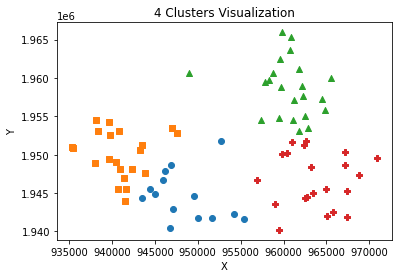

In [34]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = df_lpg[df_lpg['cluster']==0].index
marker1_ind = df_lpg[df_lpg['cluster']==1].index
marker2_ind = df_lpg[df_lpg['cluster']==2].index
marker3_ind = df_lpg[df_lpg['cluster']==3].index


# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 X, Y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=df_lpg.loc[marker0_ind,'X'], y=df_lpg.loc[marker0_ind,'Y'], marker='o') 
plt.scatter(x=df_lpg.loc[marker1_ind,'X'], y=df_lpg.loc[marker1_ind,'Y'], marker='s')
plt.scatter(x=df_lpg.loc[marker2_ind,'X'], y=df_lpg.loc[marker2_ind,'Y'], marker='^')
plt.scatter(x=df_lpg.loc[marker3_ind,'X'], y=df_lpg.loc[marker3_ind,'Y'], marker='P')


plt.xlabel('X')
plt.ylabel('Y')
plt.title('4 Clusters Visualization')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


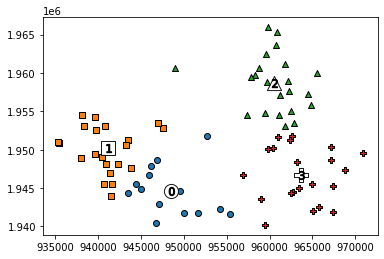

In [40]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(df_lpg)
df_lpg['kmeans_label']  = cluster_labels

#cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행. 
for label in unique_labels:
    label_cluster = df_lpg[df_lpg['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['X'], y=label_cluster['Y'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 위치 좌표 시각화 
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)

plt.show()

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium

In [46]:
map=folium.Map(location=[df_lpg['Y'].mean(),df_lpg['X'].mean()], zoom_start=11.5 )

In [47]:
map